In [125]:
import pandas as pd
import numpy as np

In [126]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

In [127]:
!wget $data

--2025-10-06 11:25:22--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.5’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.005s  

2025-10-06 11:25:22 (177 MB/s) - ‘car_fuel_efficiency.csv.5’ saved [874188/874188]



In [128]:
dataf = pd.read_csv('car_fuel_efficiency.csv')
df = dataf[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [129]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [130]:
df.horsepower.median()

np.float64(149.0)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

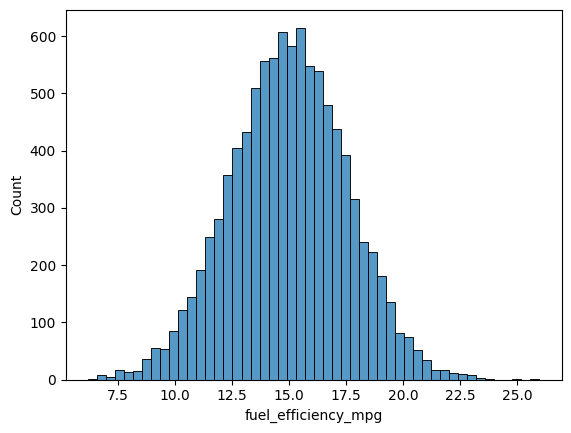

In [131]:
import seaborn as sns
sns.histplot(df.fuel_efficiency_mpg, bins=50)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

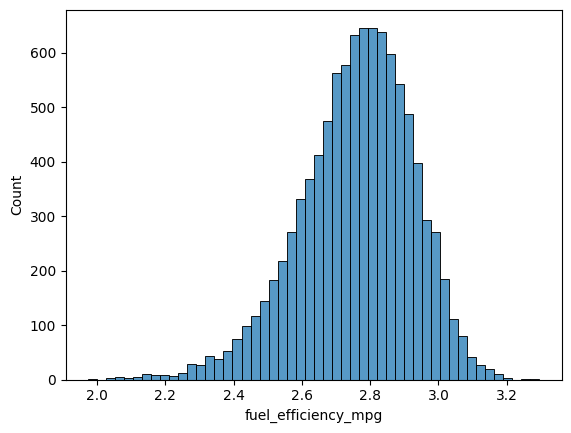

In [132]:
sns.histplot(np.log1p(df.fuel_efficiency_mpg), bins=50)

In [133]:
n=len(df)
n_train = int(n * 0.6)
n_val = int ( n * 0.2)
n_test = int ( n - n_train - n_val)

In [134]:
n_test, n_val , n_train, len(df)

(1942, 1940, 5822, 9704)

In [135]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test= df.iloc[idx[n_train + n_val:]]

In [136]:
len(df_train+df_val+df_test)

9704

In [137]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)


y_train = np.log1p(df_train.fuel_efficiency_mpg)
y_val = np.log1p(df_val.fuel_efficiency_mpg)
y_test = np.log1p(df_test.fuel_efficiency_mpg)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


In [138]:
def train_model (x, y):
    ones = np.ones(x.shape[0])
    X = np.column_stack([ones, x])
    XT = X.T
    XTX = XT.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    wfull = XTX_inv.dot(XT).dot(y)

    return wfull[0], wfull[1:]


In [139]:
def rmse(y_old, y_pred):
    error = y_old - y_pred
    sq = error **2
    mse = sq.mean()
   

    return np.sqrt(mse)

### Filling nan with 0

In [140]:
def prepare_x0(df):
    df = df.copy()
    df = df.fillna(0)
    x = df.values

    return x

In [141]:
X_train = prepare_x0(df_train)
w0, w = train_model (X_train, y_train)

y_pred = w0 + X_train.dot(w)
rmse(y_train, y_pred)

np.float64(0.03909276558794462)

In [145]:
df_train.iloc[20].to_dict()

{'engine_displacement': 160.0,
 'horsepower': 184.0,
 'vehicle_weight': 2733.2694413319136,
 'model_year': 2007.0}

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

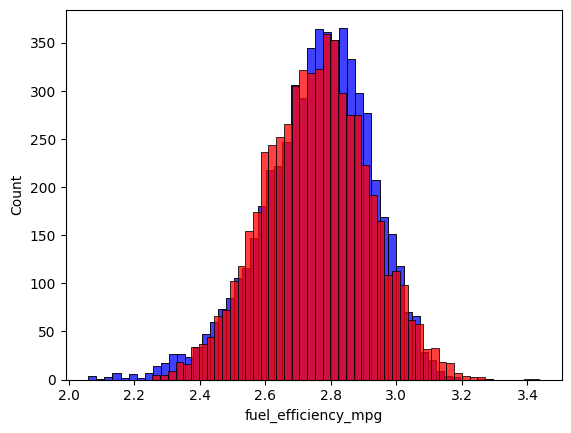

In [143]:
sns.histplot(y_train, bins=50, color = 'blue')
sns.histplot(y_pred, bins=50, color = 'red')
